<a href="https://colab.research.google.com/github/kshin2458/learn_CNN/blob/master/lern_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [9]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from matplotlib import pyplot as plt

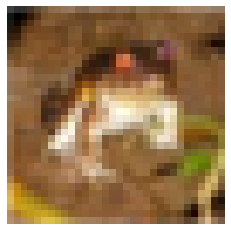

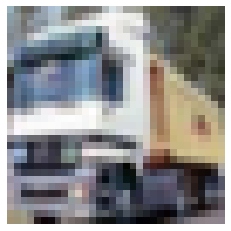

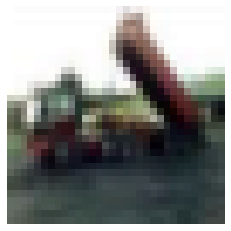

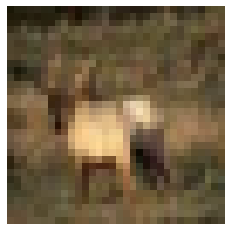

In [5]:
for img_array in x_train[0:4]:
  ax=plt.figure().add_subplot(1,1,1)
  img=array_to_img(img_array)
  ax.imshow(img)
  ax.axis("off")
  plt.show()

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [12]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.callbacks import TensorBoard
import numpy as np

In [14]:
cif_labels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

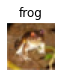

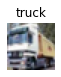

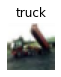

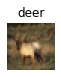

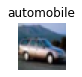

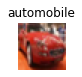

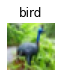

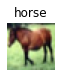

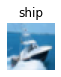

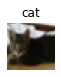

In [23]:
for i in range(10):
  ax=plt.figure().add_subplot(4,1,1)
  img=array_to_img(x_train[i])
  ax.imshow(img)
  plt.title(cif_labels[y_train[i][0]])
  ax.axis("off")
  plt.show()

In [25]:
train_data=[]
train_labels=[]
train_times=700
count=0
for index, img in enumerate(x_train):
  if y_train[index][0]==0 or y_train[index][0]==2:
    train_data.append(img)
    train_labels.append(y_train[index])
    count=count+1
  if count ==train_times:
    break

In [26]:
test_data=[]
test_labels=[]
test_times=300
count=0
for index, img in enumerate(x_test):
  if y_test[index][0]==0 or y_test[index][0]==2:
    test_data.append(img)
    test_labels.append(y_test[index])
    count=count+1
  if count ==test_times:
    break

In [28]:
_train_data=np.array(train_data)
_train_data=_train_data.astype("float32")
_train_data/=255

_test_data=np.array(test_data)
_test_data=_test_data.astype("float32")
_test_data/=255

In [29]:
_train_labels=np_utils.to_categorical(train_labels, 10)
_test_labels=np_utils.to_categorical(test_labels, 10)

In [32]:
model=Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [35]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
tsb=TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/learnCNN/logs")

Train on 560 samples, validate on 140 samples
Epoch 1/20
560/560 [==============================] - 4s 7ms/step - loss: 4.4782e-04 - accuracy: 1.0000 - val_loss: 1.3678 - val_accuracy: 0.8786
Epoch 2/20
560/560 [==============================] - 4s 7ms/step - loss: 2.6673e-04 - accuracy: 1.0000 - val_loss: 1.3656 - val_accuracy: 0.8786
Epoch 3/20
560/560 [==============================] - 4s 7ms/step - loss: 3.0741e-04 - accuracy: 1.0000 - val_loss: 1.3670 - val_accuracy: 0.8786
Epoch 4/20
560/560 [==============================] - 4s 6ms/step - loss: 2.3115e-04 - accuracy: 1.0000 - val_loss: 1.3918 - val_accuracy: 0.8786
Epoch 5/20
560/560 [==============================] - 4s 6ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 1.5802 - val_accuracy: 0.8143
Epoch 6/20
560/560 [==============================] - 4s 6ms/step - loss: 0.0842 - accuracy: 0.9768 - val_loss: 1.4609 - val_accuracy: 0.8571
Epoch 7/20
560/560 [==============================] - 4s 7ms/step - loss: 0.1109 - acc

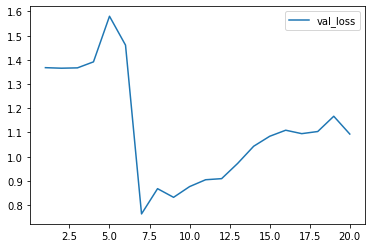

In [65]:
batch_size=32
epochs=20
history=model.fit(_train_data, _train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[tsb])
n=list(range(1,epochs+1))
plt.plot(n,history.history["val_loss"], label="val_loss")
#plt.plot(n,history.history["loss"], label="loss")
plt.legend()
plt.show()

In [66]:
img_pred=model.predict_classes(_test_data)

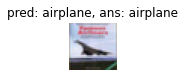

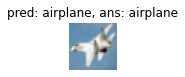

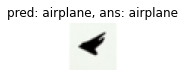

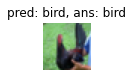

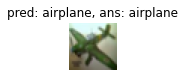

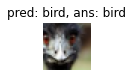

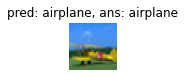

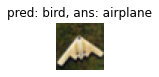

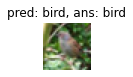

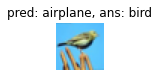

In [73]:
for i in range(10):
  ax=plt.figure().add_subplot(4,1,1)
  img=array_to_img(test_data[i])
  ax.imshow(img)
  plt.title("pred: {0}, ans: {1}".format(cif_labels[img_pred[i]], cif_labels[test_labels[i][0]]))
  ax.axis("off")
  plt.show()

In [78]:
mat=[[0,0],[0,0]]

for i in range(len(img_pred)):
  if img_pred[i]==test_labels[i][0]:
    if img_pred[i]==0:
      mat[0][0]=mat[0][0]+1
    else:
      mat[1][1]=mat[1][1]+1
  else:
    if img_pred[i]==0:
      mat[0][1]=mat[0][1]+1
    else:
      mat[1][0]=mat[1][0]+1
print(mat)

[[133, 32], [17, 118]]


In [82]:
r=100*(mat[0][0]+mat[1][1])/300
print(round(r,1))

83.7
